<a href="https://colab.research.google.com/github/Abishek0411/Computer-Vision-Projects/blob/main/CV_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 4 — Vision & Motion: Optical Flow, Background Subtraction, Tracking**

*   Demonstrate dense optical flow (Farneback) between consecutive frames (video or sequential images)
*   Implement background subtraction (MOG2) to separate moving objects
*   Simple object tracking using centroid + Kalman filter (optional)





In [5]:
# !pip -q install opencv-python-headless==4.7.0.72 scikit-image matplotlib numpy scipy scikit-learn
import cv2, sys, os, numpy as np, matplotlib.pyplot as plt
from skimage import filters, feature, morphology, measure, color, io
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


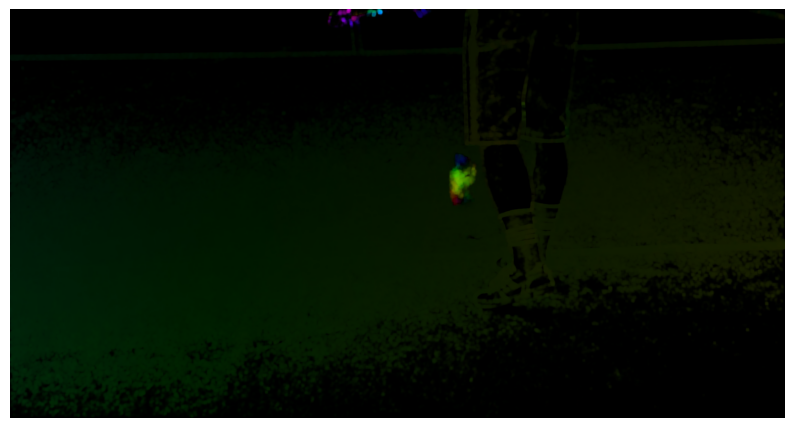

In [7]:
# Read video frames
cap = cv2.VideoCapture('/content/walk.mp4')
ret, prev = cap.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

while True:
    ret, frame = cap.read()
    if not ret: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # visualize flow (HSV)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv = np.zeros_like(frame)
    hsv[...,1] = 255
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb); plt.axis('off'); break  # show one frame
    prev_gray = gray.copy()
cap.release()


Text(0.5, 1.0, 'FG Mask')

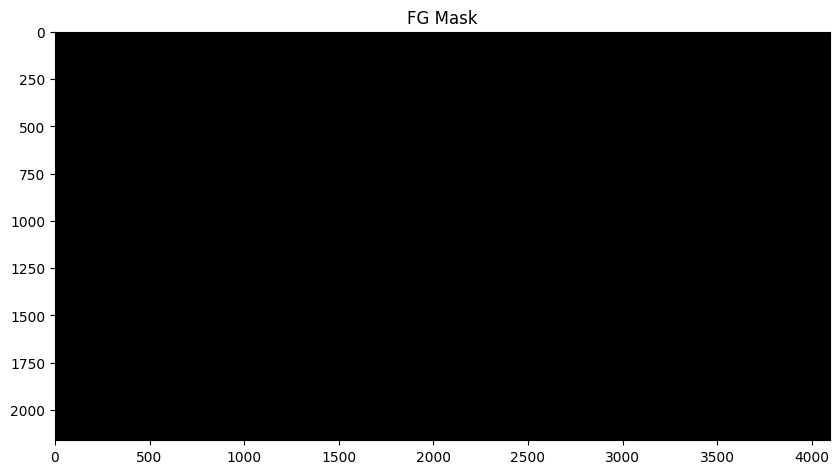

In [9]:
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
cap = cv2.VideoCapture('/content/walk.mp4')
ret, frame = cap.read()
mask = fgbg.apply(frame)
plt.imshow(mask, cmap='gray'); plt.title('FG Mask')
